<a href="https://colab.research.google.com/github/Amulyachekuri25/nptel-clone/blob/main/week1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
uploaded = files.upload()


Saving week1(dataset).xlsx to week1(dataset).xlsx


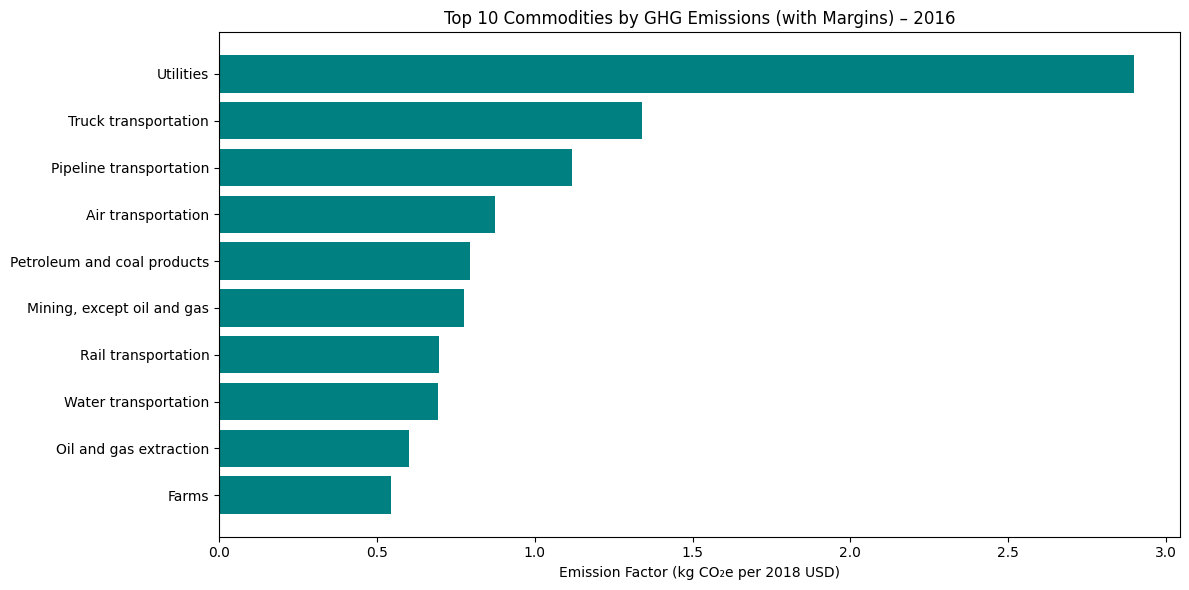

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load Excel file (adjust filename if needed)
file_path = "/content/week1(dataset).xlsx"
sheet_name = "2016_Summary_Commodity"

# Read the sheet
df = pd.read_excel(file_path, sheet_name=sheet_name)

# Clean column names
df.columns = df.columns.str.strip().str.replace("  ", " ")

# Group by commodity name and sum GHGs
df_grouped = df.groupby("Commodity Name")["Supply Chain Emission Factors with Margins"].sum().reset_index()

# Top 10 commodities by emissions
top_10 = df_grouped.sort_values(by="Supply Chain Emission Factors with Margins", ascending=False).head(10)

# Plot
plt.figure(figsize=(12, 6))
plt.barh(top_10["Commodity Name"], top_10["Supply Chain Emission Factors with Margins"], color='teal')
plt.xlabel("Emission Factor (kg CO₂e per 2018 USD)")
plt.title("Top 10 Commodities by GHG Emissions (with Margins) – 2016")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()


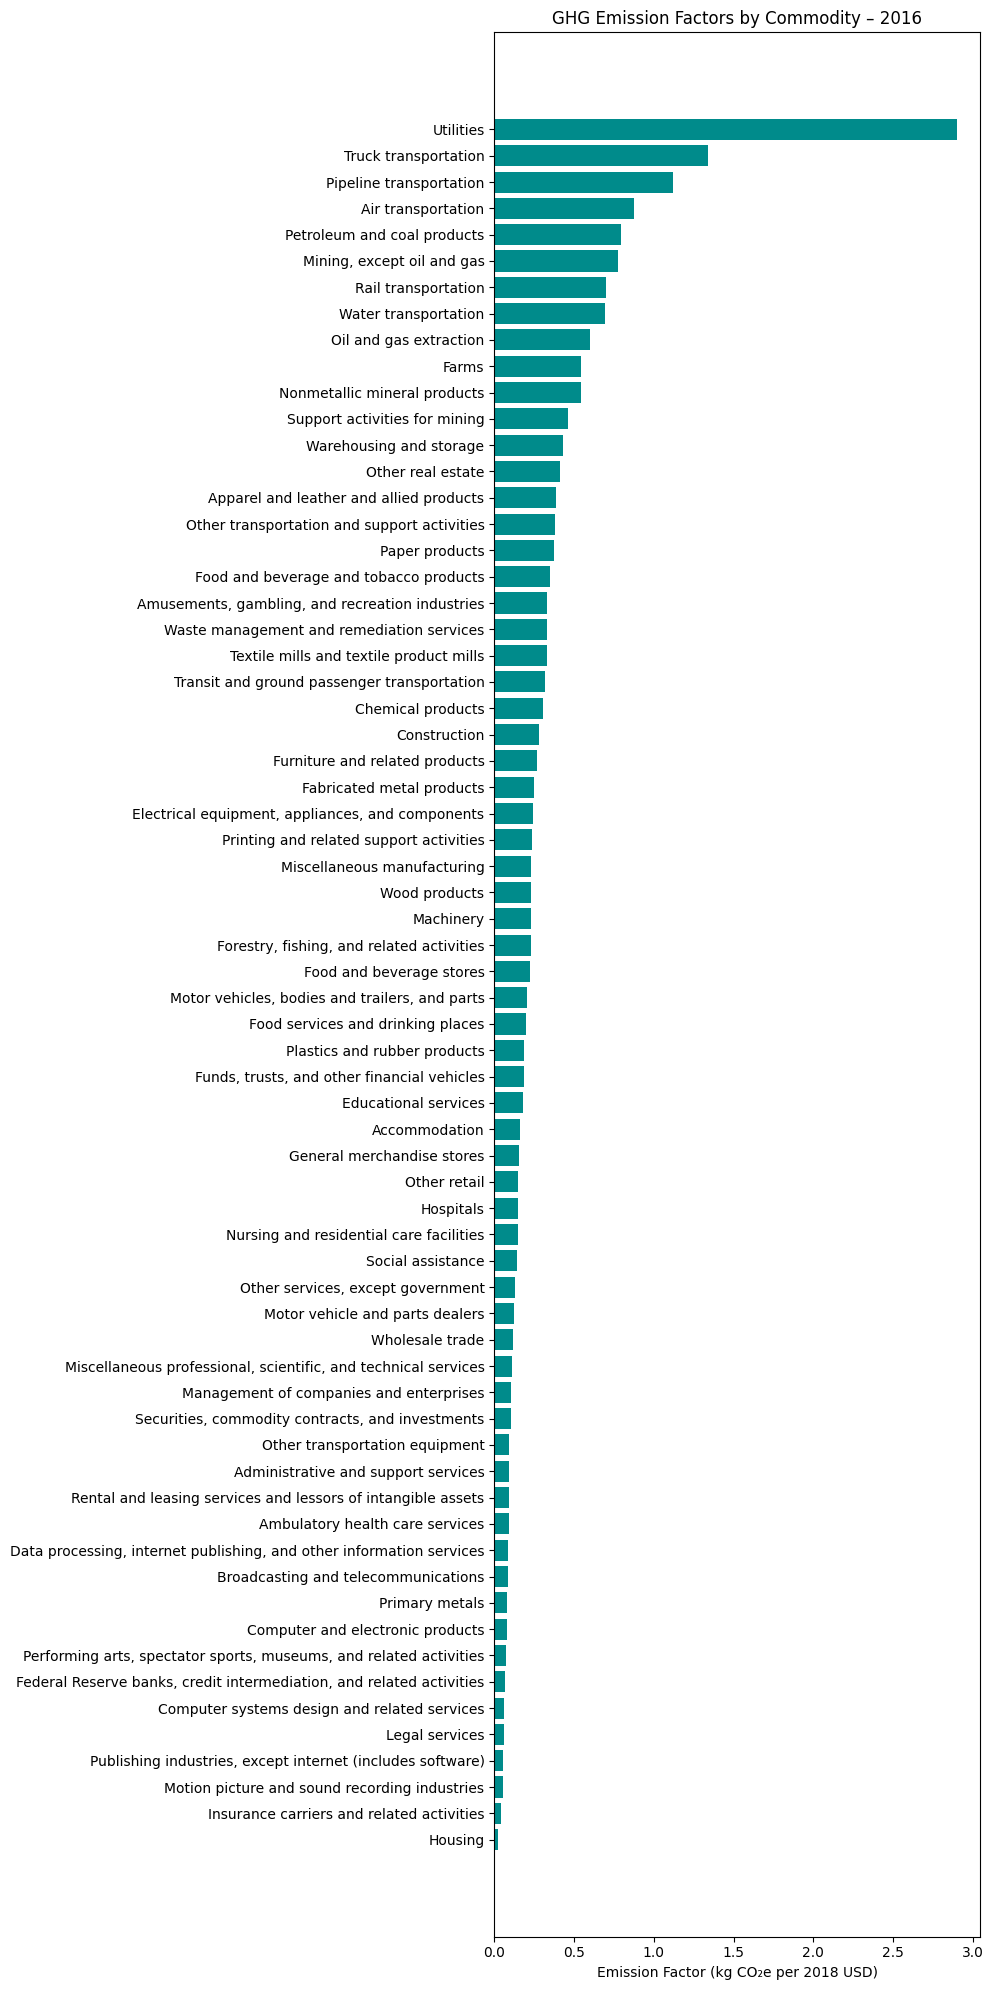

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt


file_path = "/content/week1(dataset).xlsx"
df = pd.read_excel(file_path, sheet_name="2016_Summary_Commodity")


df.columns = df.columns.str.strip().str.replace("  ", " ")

df_grouped = df.groupby("Commodity Name")["Supply Chain Emission Factors with Margins"].sum().reset_index()
df_grouped = df_grouped.sort_values(by="Supply Chain Emission Factors with Margins", ascending=False)

plt.figure(figsize=(10, 20))
plt.barh(df_grouped["Commodity Name"], df_grouped["Supply Chain Emission Factors with Margins"], color='darkcyan')
plt.xlabel("Emission Factor (kg CO₂e per 2018 USD)")
plt.title("GHG Emission Factors by Commodity – 2016")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()


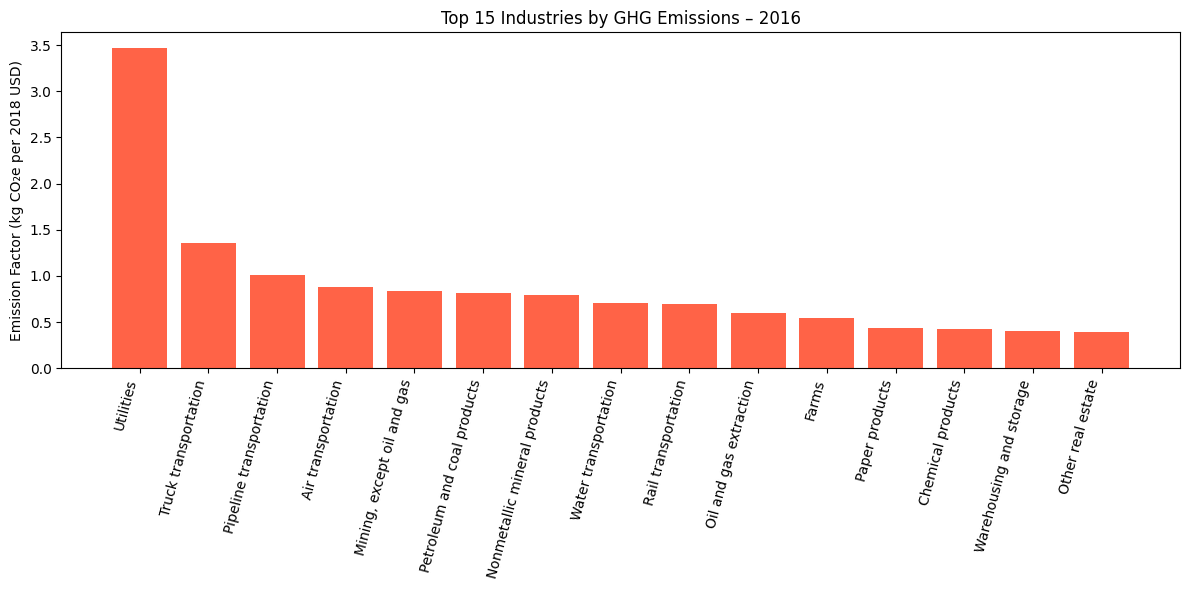

In [ ]:

df_industry = pd.read_excel(file_path, sheet_name="2016_Summary_Industry")

df_industry.columns = df_industry.columns.str.strip().str.replace("  ", " ")

df_grouped_industry = df_industry.groupby("Industry Name")["Supply Chain Emission Factors with Margins"].sum().reset_index()
df_top15 = df_grouped_industry.sort_values(by="Supply Chain Emission Factors with Margins", ascending=False).head(15)

plt.figure(figsize=(12, 6))
plt.bar(df_top15["Industry Name"], df_top15["Supply Chain Emission Factors with Margins"], color='tomato')
plt.xticks(rotation=75, ha='right')
plt.ylabel("Emission Factor (kg CO₂e per 2018 USD)")
plt.title("Top 15 Industries by GHG Emissions – 2016")
plt.tight_layout()
plt.show()


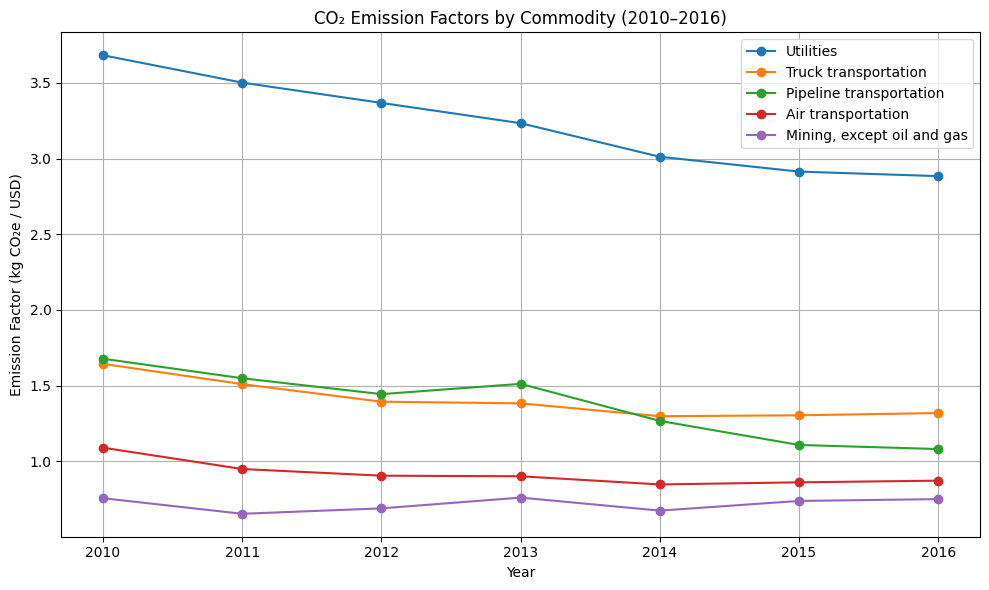

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

file_path = "/content/week1(dataset).xlsx"
excel_data = pd.ExcelFile(file_path)

years = list(range(2010, 2017))
sheet_names = [f"{year}_Summary_Commodity" for year in years]

all_data = []

for year, sheet in zip(years, sheet_names):
    df = excel_data.parse(sheet)
    df.columns = df.columns.str.strip().str.replace("  ", " ")


    df = df[df["Substance"].str.lower() == "carbon dioxide"]


    df = df[["Commodity Name", "Supply Chain Emission Factors with Margins"]]
    df["Year"] = year
    all_data.append(df)


df_all = pd.concat(all_data)

df_pivot = df_all.pivot_table(index="Year", columns="Commodity Name", values="Supply Chain Emission Factors with Margins")


top_commodities = df_pivot.mean().sort_values(ascending=False).head(5).index


plt.figure(figsize=(10, 6))
for commodity in top_commodities:
    plt.plot(df_pivot.index, df_pivot[commodity], marker='o', label=commodity)

plt.title("CO₂ Emission Factors by Commodity (2010–2016)")
plt.xlabel("Year")
plt.ylabel("Emission Factor (kg CO₂e / USD)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
